In [0]:
import torch
import torch.nn as nn

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
!pip3 install BeautifulSoup4

You should consider upgrading via the 'C:\Users\91958\Envs\pytorch\Scripts\python.exe -m pip install --upgrade pip' command.


In [0]:
sns.get_dataset_names()

c:\users\91958\envs\pytorch\lib\site-packages\seaborn\utils.py:384: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 384 of the file c:\users\91958\envs\pytorch\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

In [0]:
flight_data = sns.load_dataset("flights")
flight_data.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [0]:
flight_data.tail()  ####12 year traveling record of the passengers.

,year,month,passengers
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390
143,1960,December,432


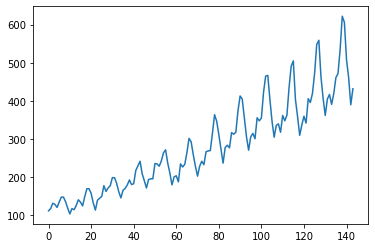

In [0]:
plt.plot(flight_data['passengers'])  

In [0]:
all_data = flight_data['passengers'].values.astype(float)
all_data

array([112., 118., 132., 129., 121., 135., 148., 148., 136., 119., 104.,
       118., 115., 126., 141., 135., 125., 149., 170., 170., 158., 133.,
       114., 140., 145., 150., 178., 163., 172., 178., 199., 199., 184.,
       162., 146., 166., 171., 180., 193., 181., 183., 218., 230., 242.,
       209., 191., 172., 194., 196., 196., 236., 235., 229., 243., 264.,
       272., 237., 211., 180., 201., 204., 188., 235., 227., 234., 264.,
       302., 293., 259., 229., 203., 229., 242., 233., 267., 269., 270.,
       315., 364., 347., 312., 274., 237., 278., 284., 277., 317., 313.,
       318., 374., 413., 405., 355., 306., 271., 306., 315., 301., 356.,
       348., 355., 422., 465., 467., 404., 347., 305., 336., 340., 318.,
       362., 348., 363., 435., 491., 505., 404., 359., 310., 337., 360.,
       342., 406., 396., 420., 472., 548., 559., 463., 407., 362., 405.,
       417., 391., 419., 461., 472., 535., 622., 606., 508., 461., 390.,
       432.])

In [0]:
####The first 132 records will be used to train the model and the last 12 records will be used as a test set. 
####The following script divides the data into training and test sets.


train_data = all_data[:-12]
test_data = all_data[-12:]

train_data

array([112., 118., 132., 129., 121., 135., 148., 148., 136., 119., 104.,
       118., 115., 126., 141., 135., 125., 149., 170., 170., 158., 133.,
       114., 140., 145., 150., 178., 163., 172., 178., 199., 199., 184.,
       162., 146., 166., 171., 180., 193., 181., 183., 218., 230., 242.,
       209., 191., 172., 194., 196., 196., 236., 235., 229., 243., 264.,
       272., 237., 211., 180., 201., 204., 188., 235., 227., 234., 264.,
       302., 293., 259., 229., 203., 229., 242., 233., 267., 269., 270.,
       315., 364., 347., 312., 274., 237., 278., 284., 277., 317., 313.,
       318., 374., 413., 405., 355., 306., 271., 306., 315., 301., 356.,
       348., 355., 422., 465., 467., 404., 347., 305., 336., 340., 318.,
       362., 348., 363., 435., 491., 505., 404., 359., 310., 337., 360.,
       342., 406., 396., 420., 472., 548., 559., 463., 407., 362., 405.])

In [0]:
test_data

array([417., 391., 419., 461., 472., 535., 622., 606., 508., 461., 390.,
       432.])

In [0]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
train_data_normalized = scaler.fit_transform(train_data .reshape(-1, 1))

train_data_normalized

array([[-0.96483516],
       [-0.93846154],
       [-0.87692308],
       [-0.89010989],
       [-0.92527473],
       [-0.86373626],
       [-0.80659341],
       [-0.80659341],
       [-0.85934066],
       [-0.93406593],
       [-1.        ],
       [-0.93846154],
       [-0.95164835],
       [-0.9032967 ],
       [-0.83736264],
       [-0.86373626],
       [-0.90769231],
       [-0.8021978 ],
       [-0.70989011],
       [-0.70989011],
       [-0.76263736],
       [-0.87252747],
       [-0.95604396],
       [-0.84175824],
       [-0.81978022],
       [-0.7978022 ],
       [-0.67472527],
       [-0.74065934],
       [-0.7010989 ],
       [-0.67472527],
       [-0.58241758],
       [-0.58241758],
       [-0.64835165],
       [-0.74505495],
       [-0.81538462],
       [-0.72747253],
       [-0.70549451],
       [-0.66593407],
       [-0.60879121],
       [-0.66153846],
       [-0.65274725],
       [-0.4989011 ],
       [-0.44615385],
       [-0.39340659],
       [-0.53846154],
       [-0

In [0]:
train_data_normalized = torch.FloatTensor(train_data_normalized).view(-1)

In [0]:
###Now create the sequences of training data for LSTM model
##we can create sequence of passenger values for 12 months and 12+1st month
##Take sequence length = 12

def create_inout_sequences(input_data, tw):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw:i+tw+1]
        inout_seq.append((train_seq ,train_label))
    return inout_seq

In [0]:
train_inout_seq = create_inout_sequences(train_data_normalized, tw = 12)

In [0]:
train_inout_seq

[(tensor([-0.9648, -0.9385, -0.8769, -0.8901, -0.9253, -0.8637, -0.8066, -0.8066,
          -0.8593, -0.9341, -1.0000, -0.9385]),
  tensor([-0.9516])),
 (tensor([-0.9385, -0.8769, -0.8901, -0.9253, -0.8637, -0.8066, -0.8066, -0.8593,
          -0.9341, -1.0000, -0.9385, -0.9516]),
  tensor([-0.9033])),
 (tensor([-0.8769, -0.8901, -0.9253, -0.8637, -0.8066, -0.8066, -0.8593, -0.9341,
          -1.0000, -0.9385, -0.9516, -0.9033]),
  tensor([-0.8374])),
 (tensor([-0.8901, -0.9253, -0.8637, -0.8066, -0.8066, -0.8593, -0.9341, -1.0000,
          -0.9385, -0.9516, -0.9033, -0.8374]),
  tensor([-0.8637])),
 (tensor([-0.9253, -0.8637, -0.8066, -0.8066, -0.8593, -0.9341, -1.0000, -0.9385,
          -0.9516, -0.9033, -0.8374, -0.8637]),
  tensor([-0.9077])),
 (tensor([-0.8637, -0.8066, -0.8066, -0.8593, -0.9341, -1.0000, -0.9385, -0.9516,
          -0.9033, -0.8374, -0.8637, -0.9077]),
  tensor([-0.8022])),
 (tensor([-0.8066, -0.8066, -0.8593, -0.9341, -1.0000, -0.9385, -0.9516, -0.9033,
      

In [0]:
len(train_inout_seq)

120

In [0]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):     ## for each month we have only 1 value i.e.
                                                                                ##total number of passengers, therefore the input size will be 1.
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),      ###contains previous hidden and cell state
                            torch.zeros(1,1,self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

In [0]:
import torch.optim as optim
model = LSTM()
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [0]:
epochs = 4

for i in range(epochs):
    for seq, labels in train_inout_seq:
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))

        y_pred = model(seq)

        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()

    
#         print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   3 loss: 0.0016030120


In [0]:
test_inputs = train_data_normalized[-12:].tolist()
print(test_inputs)

model.eval()

for i in range(12):
    seq = torch.FloatTensor(test_inputs[-12:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
        test_inputs.append(model(seq).item())
                

[0.12527473270893097, 0.04615384712815285, 0.3274725377559662, 0.2835164964199066, 0.3890109956264496, 0.6175824403762817, 0.9516483545303345, 1.0, 0.5780220031738281, 0.33186814188957214, 0.13406594097614288, 0.32307693362236023]


In [0]:
print(test_inputs)             ######24values----------last 12 values are predicted values

[0.12527473270893097, 0.04615384712815285, 0.3274725377559662, 0.2835164964199066, 0.3890109956264496, 0.6175824403762817, 0.9516483545303345, 1.0, 0.5780220031738281, 0.33186814188957214, 0.13406594097614288, 0.32307693362236023, 0.3082144260406494, 0.30994898080825806, 0.31106385588645935, 0.31174004077911377, 0.31213945150375366, 0.31236302852630615, 0.3124765455722809, 0.3125207722187042, 0.312532901763916, 0.31254589557647705, 0.3125610053539276, 0.31257885694503784]


In [0]:
test_inputs[12:]   ##predicted values

[0.3082144260406494,
 0.30994898080825806,
 0.31106385588645935,
 0.31174004077911377,
 0.31213945150375366,
 0.31236302852630615,
 0.3124765455722809,
 0.3125207722187042,
 0.312532901763916,
 0.31254589557647705,
 0.3125610053539276,
 0.31257885694503784]

In [0]:
actual_predictions = scaler.inverse_transform(np.array(test_inputs[12:] ).reshape(-1, 1))
print(actual_predictions)

[[401.61878192]
 [402.01339313]
 [402.26702721]
 [402.42085928]
 [402.51172522]
 [402.56258899]
 [402.58841412]
 [402.59847568]
 [402.60123515]
 [402.60419124]
 [402.60762872]
 [402.61168995]]
